In [25]:
# feature selection
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [2]:
path = "F:/for learn/Python_ML_and_Kaggle/Datasets/"
titanic = pd.read_csv(path + "titanic.txt")

In [16]:
y = titanic["survived"]
x = titanic.drop(["row.names", "name", "survived"], axis=1)
x["age"].fillna(x["age"].mean(),inplace=True)
x.fillna("Unknown", inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

In [19]:
vec = DictVectorizer()
vec.fit(x.to_dict(orient="record"))
x_train = vec.transform(x_train.to_dict(orient="record"))
x_test = vec.transform(x_test.to_dict(orient="record"))
print(vec.feature_names_)

['age', 'boat=(101)', 'boat=(103)', 'boat=(108)', 'boat=(109)', 'boat=(110)', 'boat=(121)', 'boat=(122)', 'boat=(124)', 'boat=(126)', 'boat=(130)', 'boat=(133)', 'boat=(135)', 'boat=(140)', 'boat=(142)', 'boat=(147)', 'boat=(148)', 'boat=(149)', 'boat=(15)', 'boat=(165)', 'boat=(166)', 'boat=(169)', 'boat=(17)', 'boat=(171)', 'boat=(172)', 'boat=(174)', 'boat=(175)', 'boat=(18)', 'boat=(189)', 'boat=(19)', 'boat=(190)', 'boat=(207)', 'boat=(208)', 'boat=(209)', 'boat=(22)', 'boat=(230)', 'boat=(232)', 'boat=(234)', 'boat=(236)', 'boat=(241)', 'boat=(245)', 'boat=(249)', 'boat=(256)', 'boat=(258)', 'boat=(259)', 'boat=(260)', 'boat=(263)', 'boat=(269)', 'boat=(271)', 'boat=(275)', 'boat=(283)', 'boat=(286)', 'boat=(287)', 'boat=(292)', 'boat=(293)', 'boat=(294)', 'boat=(295)', 'boat=(297)', 'boat=(299)', 'boat=(305)', 'boat=(307)', 'boat=(322)', 'boat=(35)', 'boat=(38)', 'boat=(43)', 'boat=(45)', 'boat=(46)', 'boat=(52)', 'boat=(62)', 'boat=(72)', 'boat=(75)', 'boat=(79)', 'boat=(80)', 

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_predict = dt.predict(x_test)
print("the score of DT without filtering features is ",dt.score(x_test, y_test))

the score of DT without filtering features is  0.835866261398


In [51]:
# 引入根据卡方相关性的特征选择器
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.cross_validation import cross_val_score
import pylab as pl

In [50]:
# 利用 5折CV法 在训练集上对合适的特征选择量进行验证
percentiles = range(1, 100, 2)
results = []
for i in percentiles:
    fs = SelectPercentile(score_func=chi2, percentile=i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    # 由于是5折验证， 所以输出score时是5个
    scores = cross_val_score(dt, x_train_fs, y_train, cv=5)
    results.append(scores.mean())
results = np.array(list(map(lambda x: round(x, 4), results)))
print(results)
print("the Optimal Number of Features is %d" % (percentiles[results.argmax()]))

[ 0.8527  0.8648  0.8842  0.8903  0.8812  0.8731  0.8741  0.8731  0.8731
  0.871   0.872   0.871   0.8669  0.8659  0.8659  0.867   0.8649  0.87
  0.869   0.869   0.871   0.8679  0.872   0.871   0.872   0.8771  0.8679
  0.8689  0.873   0.872   0.871   0.873   0.873   0.8741  0.8669  0.8669
  0.868   0.8669  0.869   0.8669  0.8659  0.872   0.872   0.87    0.873
  0.8669  0.8751  0.871   0.868   0.8741]
the Optimal Number of Features is 7


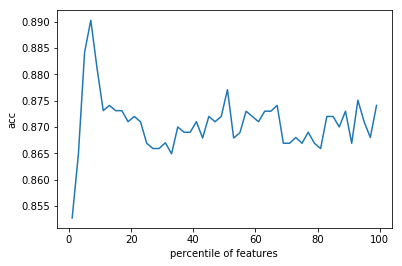

In [52]:
pl.plot(percentiles, results)
pl.xlabel("percentile of features")
pl.ylabel("acc")
pl.show()

In [86]:
# 利用得到的最优参数重新训练，并对测试集进行预测
fs = SelectPercentile(score_func=chi2, percentile=percentiles[results.argmax()])
x_train_fs = fs.fit_transform(x_train, y_train)
selectedFeatures = np.array(vec.feature_names_)[fs.get_support()]
dt.fit(x_train_fs, y_train)
x_test_fs = fs.transform(x_test)
print("the score of DT with filtering features is ",dt.score(x_test_fs, y_test))

the score of DT with filtering features is  0.863221884498
